In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)


In [18]:
# Load dataset
df = pd.read_csv("cleaned_data.csv")

# View first 5 rows
df.head()


,model,price,rating,os,sim_type,network_type,VoLTE,NFC,ir_blaster,chipset,core_type,clock_ghz,ram_gb,storage_gb,battery_mah,fast_charge_w,screen_size_in,resolution,refresh_rate_hz,display_type,rear_camera_mp_list,rear_camera_count,rear_camera_max_mp,front_camera_mp,memory_card_supported,memory_card_type,memory_card_max_gb
0,oneplus 11 5g,54999,89.0,Android v13,Dual,5g,True,True,False,Snapdragon 8 Gen2,Octa Core,3.2,12,12,5000.0,100.0,6.70,1440x3216,120.0,Punch Hole,"[50, 48, 32]",3,50.0,16.0,1,NaN,NaN
1,oneplus nord ce 2 lite 5g,19989,81.0,Android v12,Dual,5g,True,False,False,Snapdragon 695,Octa Core,2.2,6,6,5000.0,33.0,6.59,1080x2412,120.0,Punch Hole,"[64, 2, 2]",3,64.0,16.0,1,Hybrid,1024.0
2,samsung galaxy a14 5g,16499,75.0,Android v13,Dual,5g,True,False,False,Exynos 1330,Octa Core,2.4,4,4,5000.0,15.0,6.60,1080x2408,90.0,Water Drop Notch,"[50, 2, 2]",3,50.0,13.0,1,Dedicated,1024.0
3,motorola moto g62 5g,14999,81.0,Android v12,Dual,5g,True,False,False,Snapdragon 695,Octa Core,2.2,6,6,5000.0,NaN,6.55,1080x2400,120.0,Punch Hole,"[50, 8, 2]",3,50.0,16.0,1,Hybrid,1024.0
4,realme 10 pro plus,24999,82.0,Android v13,Dual,5g,True,False,False,Dimensity 1080,Octa Core,2.6,6,6,5000.0,67.0,6.70,1080x2412,120.0,Punch Hole,"[108, 8, 2]",3,108.0,16.0,1,NaN,NaN


In [19]:
# Number of rows and columns
df.shape


(968, 27)

In [20]:

# Dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model                  968 non-null    object 
 1   price                  968 non-null    int64  
 2   rating                 968 non-null    float64
 3   os                     942 non-null    object 
 4   sim_type               968 non-null    object 
 5   network_type           968 non-null    object 
 6   VoLTE                  968 non-null    bool   
 7   NFC                    968 non-null    bool   
 8   ir_blaster             968 non-null    bool   
 9   chipset                968 non-null    object 
 10  core_type              962 non-null    object 
 11  clock_ghz              927 non-null    float64
 12  ram_gb                 968 non-null    int64  
 13  storage_gb             968 non-null    int64  
 14  battery_mah            957 non-null    float64
 15  fast_c

In [21]:
df.isnull().sum()


model                      0
price                      0
rating                     0
os                        26
sim_type                   0
network_type               0
VoLTE                      0
NFC                        0
ir_blaster                 0
chipset                    0
core_type                  6
clock_ghz                 41
ram_gb                     0
storage_gb                 0
battery_mah               11
fast_charge_w            204
screen_size_in             1
resolution                 1
refresh_rate_hz          360
display_type              85
rear_camera_mp_list        0
rear_camera_count          0
rear_camera_max_mp        16
front_camera_mp           25
memory_card_supported      0
memory_card_type         127
memory_card_max_gb       468
dtype: int64

In [22]:
df.describe()


,price,rating,clock_ghz,ram_gb,storage_gb,battery_mah,fast_charge_w,screen_size_in,refresh_rate_hz,rear_camera_count,rear_camera_max_mp,front_camera_mp,memory_card_supported,memory_card_max_gb
count,968.000000,968.000000,927.000000,968.000000,968.000000,957.000000,764.00000,967.000000,608.000000,968.000000,952.000000,943.000000,968.0,500.000000
mean,32745.954545,78.540289,2.430237,7.641529,7.641529,4819.935214,46.25877,6.535998,111.656250,2.268595,50.737395,16.714740,1.0,741.136000
std,39707.710721,6.953266,0.464864,23.123619,23.123619,1012.724563,34.30833,0.381498,18.488393,0.905096,33.209502,10.889245,0.0,375.426488
min,2999.000000,60.000000,1.000000,1.000000,1.000000,1500.000000,10.00000,2.400000,90.000000,0.000000,2.000000,2.000000,1.0,32.000000
25%,12999.000000,75.000000,2.050000,4.000000,4.000000,4500.000000,18.00000,6.500000,90.000000,1.000000,48.000000,8.000000,1.0,512.000000
50%,19999.000000,80.000000,2.360000,6.000000,6.000000,5000.000000,33.00000,6.580000,120.000000,3.000000,50.000000,16.000000,1.0,1024.000000
75%,35992.250000,84.000000,2.840000,8.000000,8.000000,5000.000000,66.00000,6.670000,120.000000,3.000000,64.000000,16.000000,1.0,1024.000000
max,650000.000000,89.000000,3.220000,512.000000,512.000000,22000.000000,240.00000,8.030000,240.000000,4.000000,200.000000,60.000000,1.0,2048.000000


In [23]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns

numerical_cols, categorical_cols


(Index(['price', 'rating', 'clock_ghz', 'ram_gb', 'storage_gb', 'battery_mah',
        'fast_charge_w', 'screen_size_in', 'refresh_rate_hz',
        'rear_camera_count', 'rear_camera_max_mp', 'front_camera_mp',
        'memory_card_supported', 'memory_card_max_gb'],
       dtype='object'),
 Index(['model', 'os', 'sim_type', 'network_type', 'VoLTE', 'NFC', 'ir_blaster',
        'chipset', 'core_type', 'resolution', 'display_type',
        'rear_camera_mp_list', 'memory_card_type'],
       dtype='object'))

In [24]:
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
price,968.0,32745.954545,39707.710721,2999.0,12999.00,19999.00,35992.25,650000.00
rating,968.0,78.540289,6.953266,60.0,75.00,80.00,84.00,89.00
clock_ghz,927.0,2.430237,0.464864,1.0,2.05,2.36,2.84,3.22
ram_gb,968.0,7.641529,23.123619,1.0,4.00,6.00,8.00,512.00
storage_gb,968.0,7.641529,23.123619,1.0,4.00,6.00,8.00,512.00
battery_mah,957.0,4819.935214,1012.724563,1500.0,4500.00,5000.00,5000.00,22000.00
fast_charge_w,764.0,46.258770,34.308330,10.0,18.00,33.00,66.00,240.00
screen_size_in,967.0,6.535998,0.381498,2.4,6.50,6.58,6.67,8.03
refresh_rate_hz,608.0,111.656250,18.488393,90.0,90.00,120.00,120.00,240.00
rear_camera_count,968.0,2.268595,0.905096,0.0,1.00,3.00,3.00,4.00


In [25]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head(10))



Value counts for model:
model
apple iphone 14 pro max             4
realme gt neo 3t                    3
poco x4 pro 5g                      3
oneplus nord ce 2 lite 5g           3
apple iphone 13 pro max             3
samsung galaxy s22 ultra 5g         3
realme 9i                           3
xiaomi redmi note 11 pro plus 5g    3
xiaomi redmi note 11                3
poco m4 pro 4g                      3
Name: count, dtype: int64

Value counts for os:
os
Android v12            380
Android v11            270
Android v13             90
Android v10             66
Android v9.0 (Pie)      29
Android v10.0           23
iOS v16                 15
iOS v15                 12
Android v8.1 (Oreo)     10
iOS v14                  6
Name: count, dtype: int64

Value counts for sim_type:
sim_type
Dual      952
Single     16
Name: count, dtype: int64

Value counts for network_type:
network_type
5g    545
4g    423
Name: count, dtype: int64

Value counts for VoLTE:
VoLTE
True     959
False      9
Nam

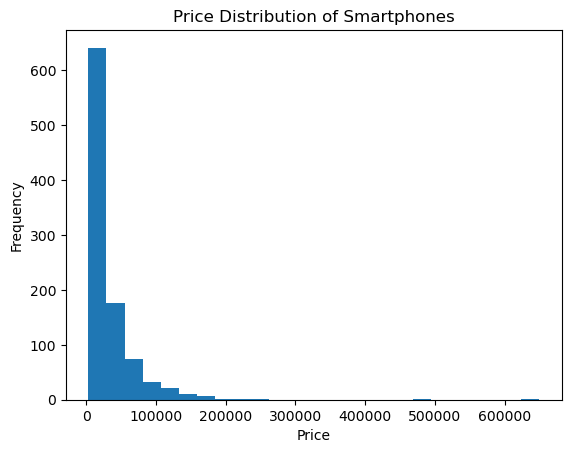

In [26]:
plt.figure()
plt.hist(df["price"], bins=25)
plt.title("Price Distribution of Smartphones")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


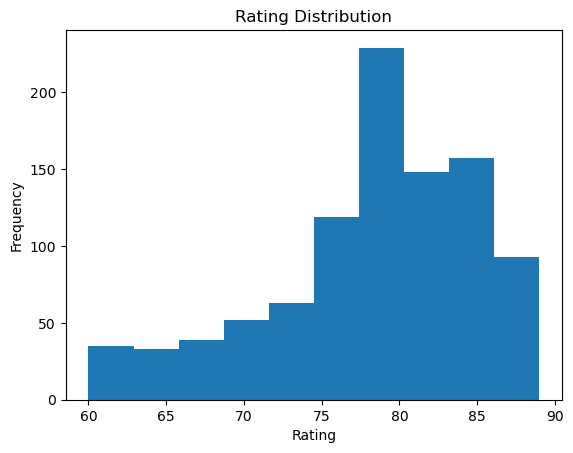

In [27]:
plt.figure()
plt.hist(df["rating"].dropna(), bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


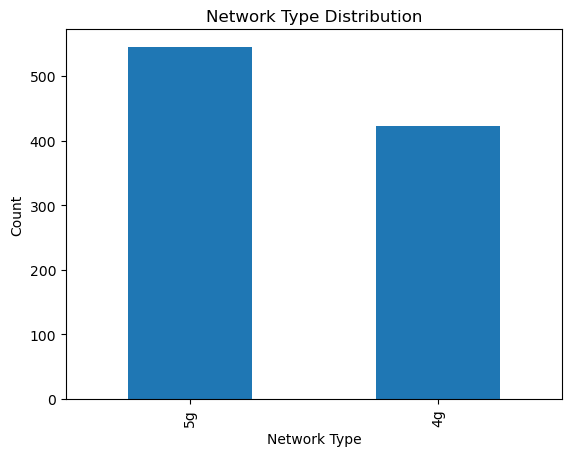

In [28]:
df["network_type"].value_counts().plot(kind="bar")
plt.title("Network Type Distribution")
plt.xlabel("Network Type")
plt.ylabel("Count")
plt.show()


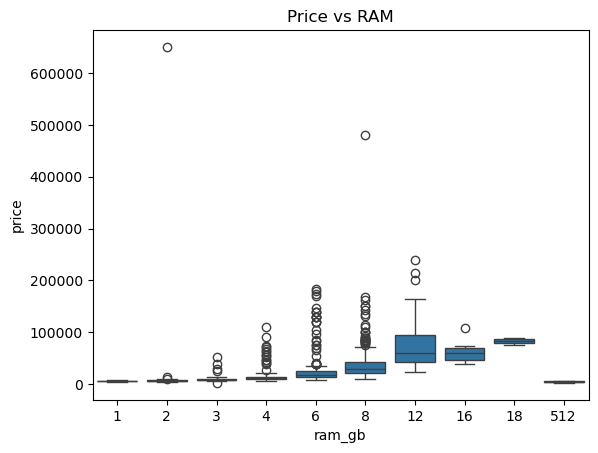

In [30]:
plt.figure()
sns.boxplot(x="ram_gb", y="price", data=df)
plt.title("Price vs RAM")
plt.show()


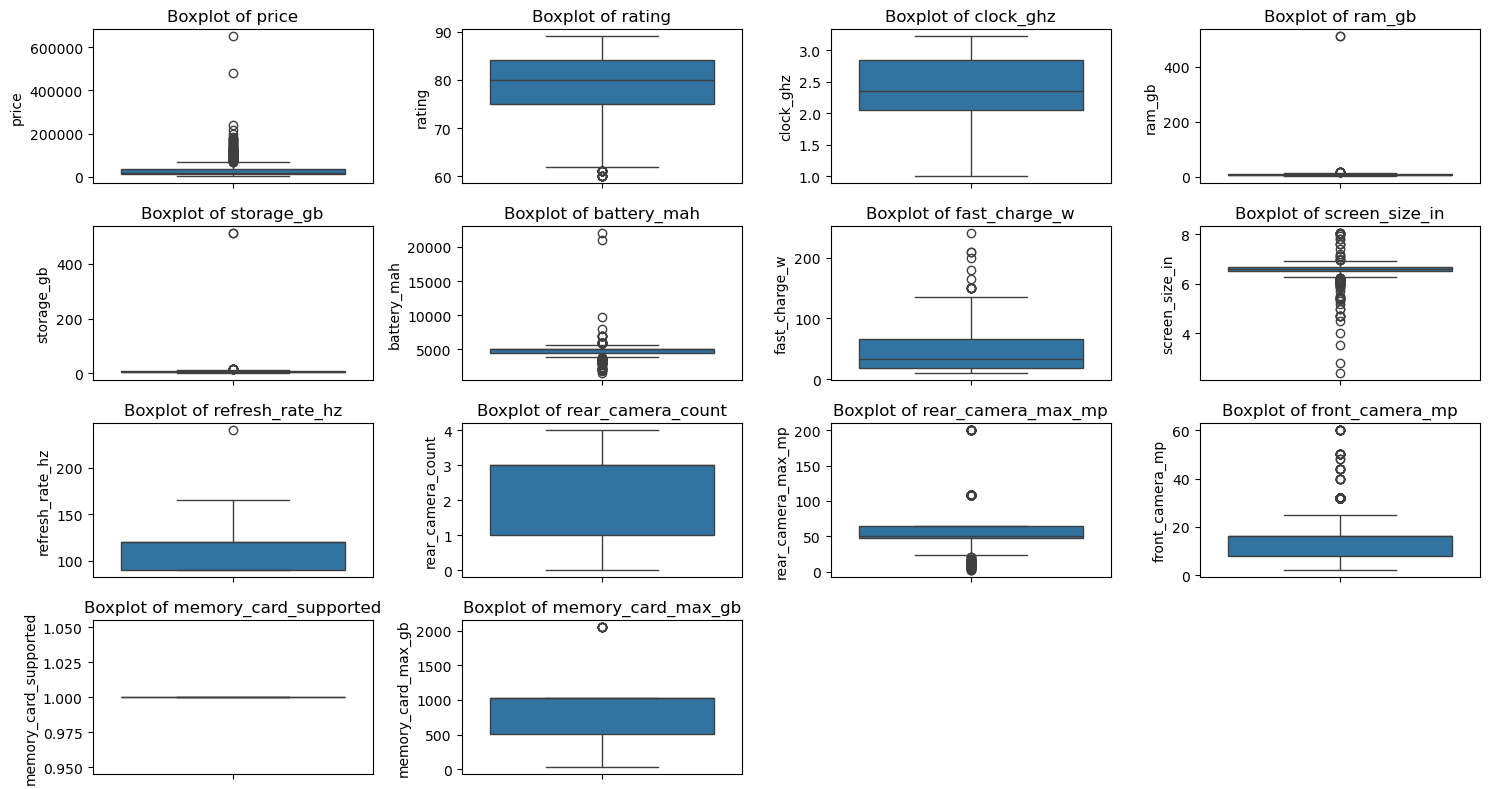

In [34]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


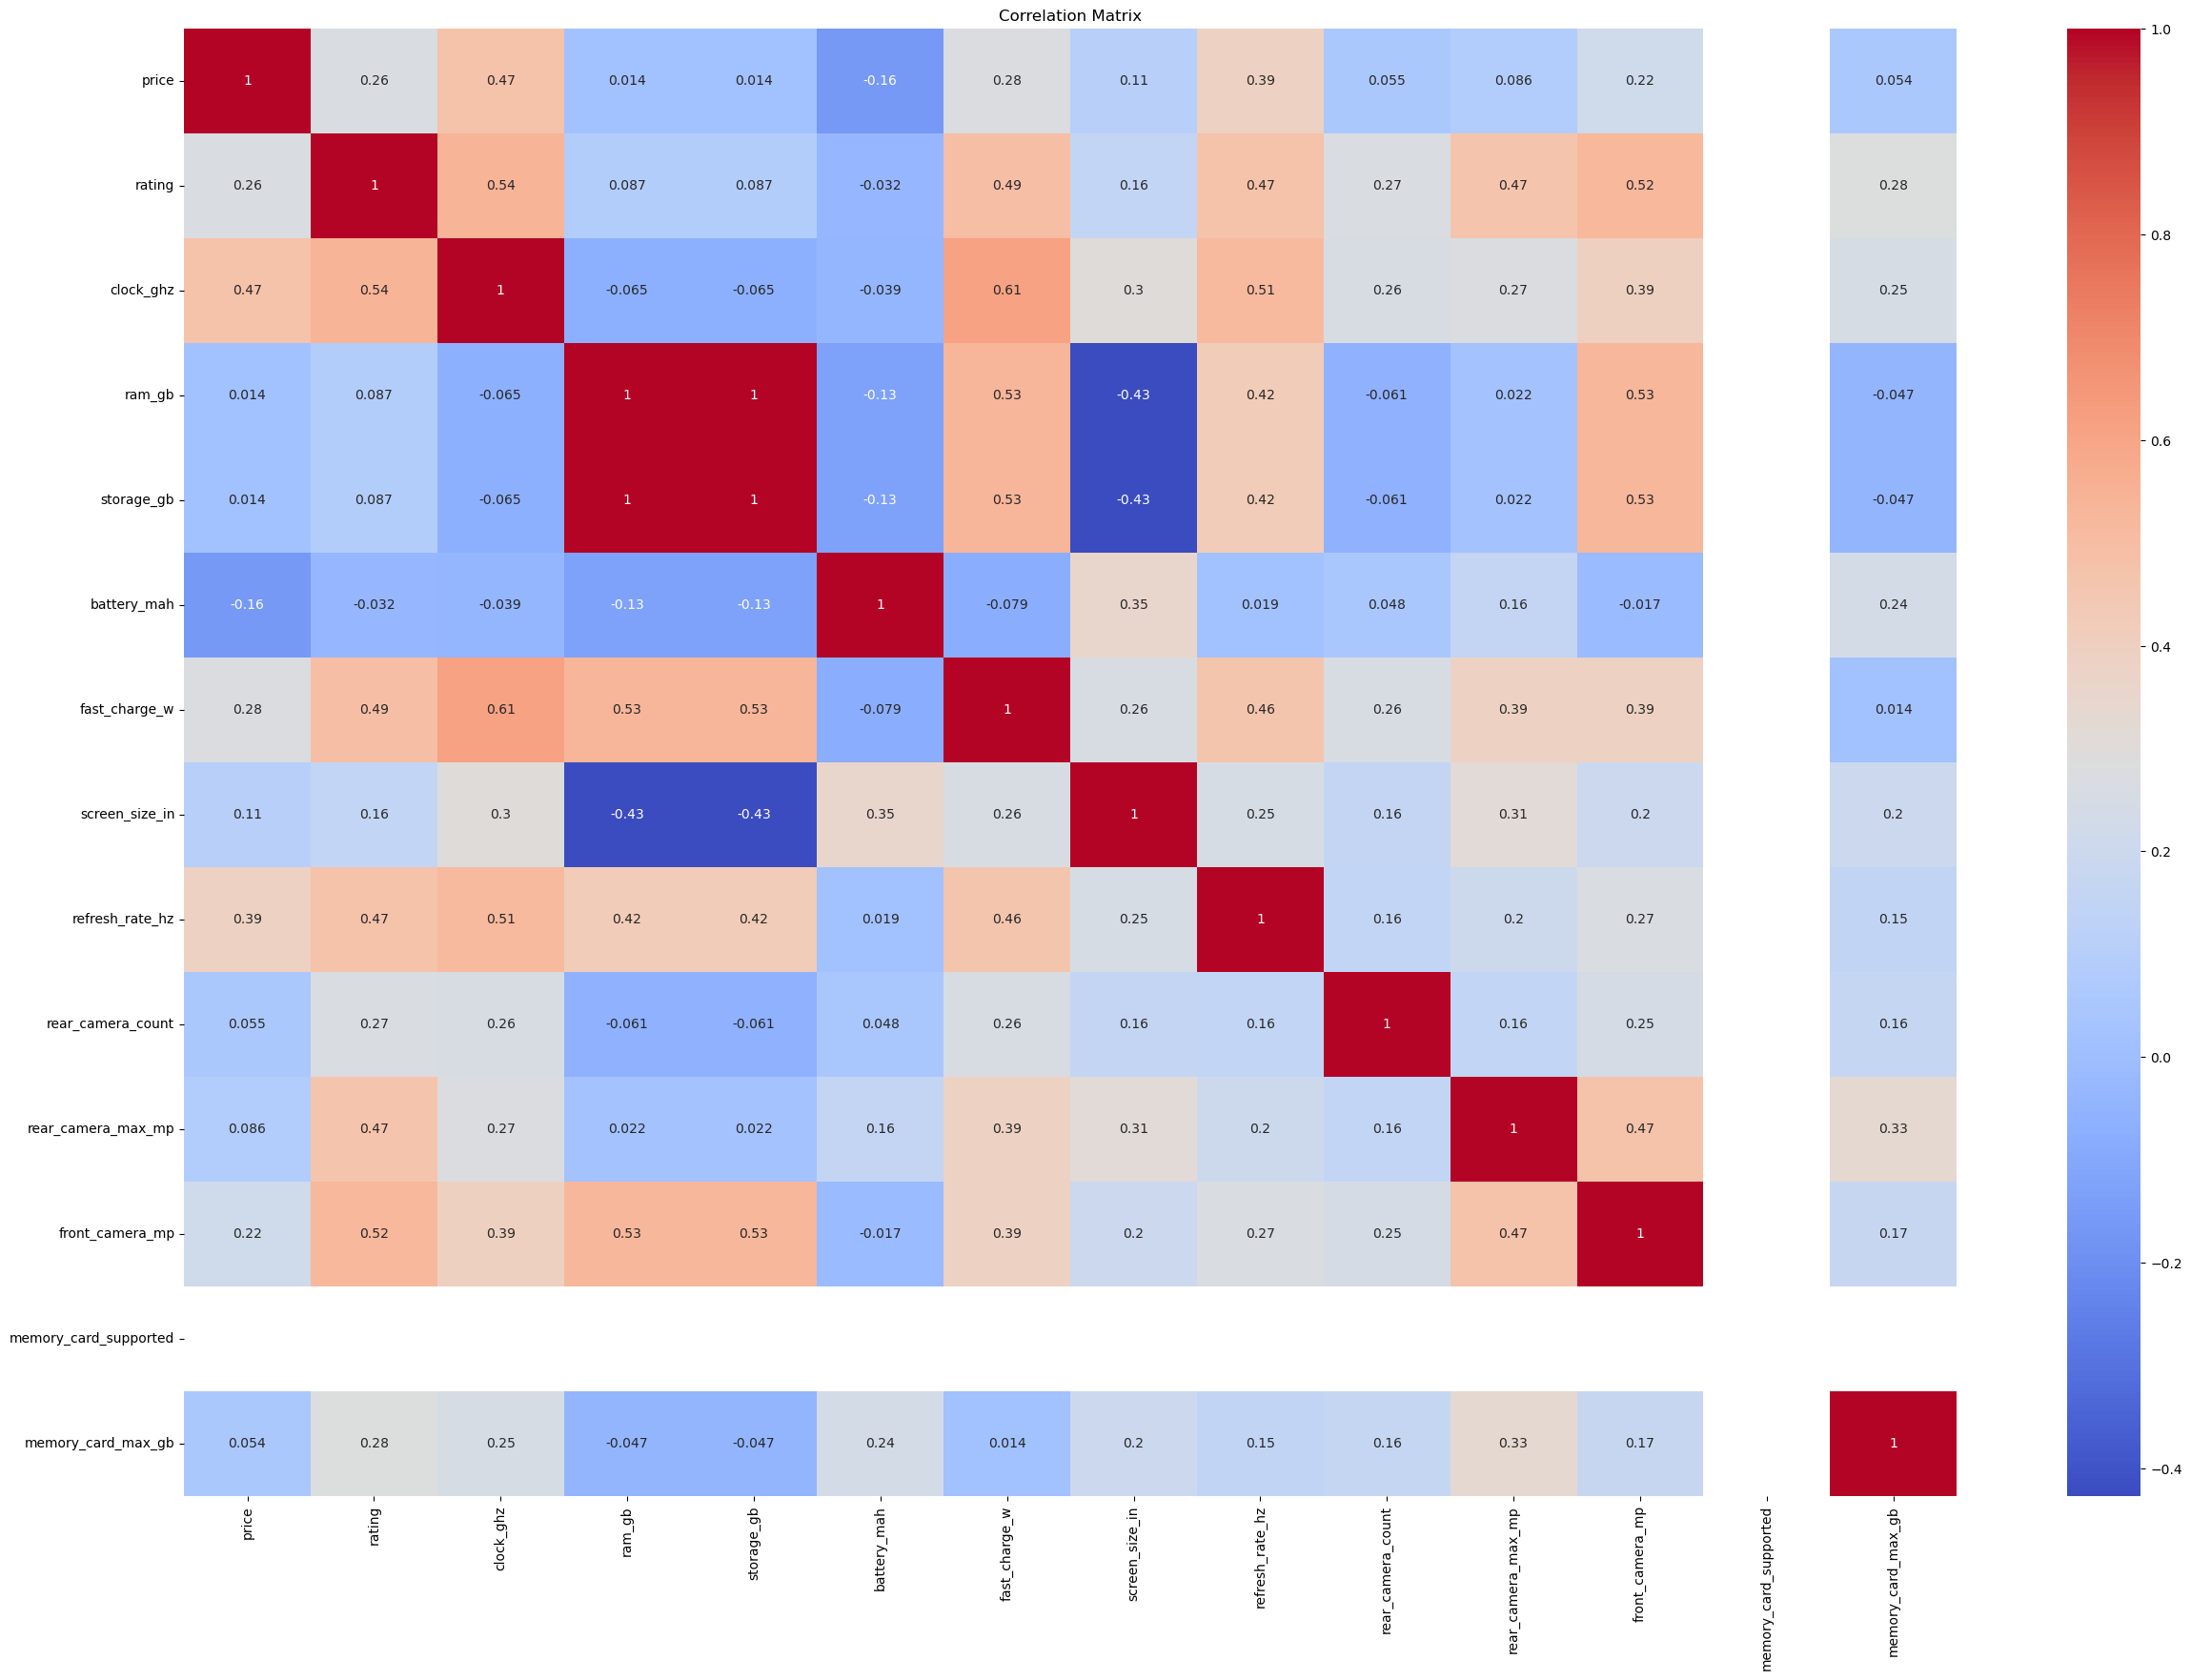

In [38]:
plt.figure(figsize=(30,20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Conclusion
The descriptive analysis shows that smartphone prices and specifications vary widely,
indicating segmentation into budget, mid-range, and premium devices.
Most smartphones support modern network technologies and offer adequate hardware features.
